# Basic Python Functions, NumPy Imaging, and kNN

## Table of Contents
[Introduction](#intro)<br>
1 - [Basic Python Functions](#basic)<br>
2 - [NumPy Imaging](#NumPy)<br>
3 - [kNN](#kNN)<br>

## Introduction <a id = 'intro'>

In this notebook, we'll work with basic python functions, which will involve some NumPy. This in no way is suppose to be an introduction to Python and this notebook will assume familiarity with the language. It's purpose in the end is to brush up the user and to serve as a "mini-prerequisite" for the rest of the notebook. Next, we'll play around with an image in order to get some exposure towards working with pixels and matrices. In the process we'll also show how your eyes are more sensitive towards different types of color and shading. Lastly, we'll create a homemade kNN model and test it against sklearn's model.

The following problems have taken heavy inspiration from [UC Berkeley's DS100 class](https://github.com/DS-100). The purpose of this notebook is to practice creating "teaching" notebooks and to further improve my data science skills by solving these problems. Aside from the problems, most of the work (questions, explainations, solutions, and creation of notebook) are mine.

### Imports

In [1]:
import math
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import skimage
import skimage.io
import skimage.filters

## 1. Basic Python Functions <a id='basic'>

The following are basic practice questions in Python in order to brush up Python skills.

#### Question 1a
Write a function `nums_reversed` that takes in a positive integer `n` and returns a string
containing the numbers 1 through `n` including `n` in reverse order, separated
by spaces.

In [48]:
def nums_reversed(n):
    """
    Takes a positive integer n and returns a string containing the numbers 1 through n,
    including n in reverse order, seperated by spaces.
    
    Args:
        n: A positive integer
    Returns:
        A string containing the numbers 1 through n in reverse order and seperated by spaces
    e.g
    nums_reversed(5)
        '5 4 3 2 1'
    """
    arr = np.arange(1, n+1) #I cheated and used NumPy
    return str((arr[::-1]))[1:-1]

In [50]:
#Testing
assert nums_reversed(5) == '5 4 3 2 1'
assert nums_reversed(1) == '1'
assert nums_reversed(3) ==  '3 2 1'

#### Question 1b

Write a function `string_splosion` that takes in a non-empty string like
`"Code"` and returns a long string containing every prefix of the input.
For example:

    >>> string_splosion('Code')
    'CCoCodCode'
    >>> string_splosion('data!')
    'ddadatdatadata!'
    >>> string_splosion('hi')
    'hhi'

In [71]:
def string_splosion(string):
    """
    This function takes a non-empty string and returns a long string containing every prefix
    of the input
    
    Args:
        string: A non-empty str
    Returns:
        A string containing every prefix of the input
    e.g
    string_splosion('Code')
        'CCoCodCode'
    string_splosion('data!')
        'ddadatdatadata!'
    string_splosion('hi')
        'hhi'
    """
    splosion = ''
    for i in range(1, len(string) + 1):
        splosion += string[:i]
    return splosion
    #The recursive way
#     if string == '':
#         return string
#     else:
#         return string_splosion(string[:-1]) + string

In [72]:
#Testing
assert string_splosion('Code') == 'CCoCodCode'
assert string_splosion('fade') == 'ffafadfade'
assert string_splosion('Kitten') == 'KKiKitKittKitteKitten'
assert string_splosion('data!') == 'ddadatdatadata!'

#### Question 1c

Write a function `double100` that takes in a list of integers
and returns `True` only if the list has two `100`s next to each other.

In [91]:
def double100(nums):
    """
    Given a list of integers, return True if the list has two 100s next to each other. Otherwise False
    
    Args:
        nums: a list of integers
    Returns:
        A boolean determining whether there are two 100s next to each other
    e.g.
    double100([100, 2, 3, 100])
        False
    double100([2, 3, 100, 100, 5])
        True
    """
    for i in range(1, len(nums) - 1):
        if nums[i] == 100:
            if nums[i - 1] == 100 or nums[i + 1] == 100:
                return True
    else:
        return False

In [140]:
#Testing
assert double100([3, 3, 100, 100]) == True
assert double100([5, 2, 5, 2]) == False
assert double100([4, 2, 4, 100, 100, 5]) == True
assert double100([4, 2, 4, 10, 10, 5]) == False
assert double100([100, 2, 3, 100]) == False

Now we begin working with NumPy

#### Question 1d

Write a function `multiply_list` that takes in a list and a multiplier
and returns a list containing each element in the list multiplied by 
the multiplier. 

In [103]:
def multiply_list(some_list, multiplier):
    """
    Given a list and a multiplier, return a list containing each element in the list multiplied by 
    the multiplier. 
    You may assume that the lists are well formed and not nested more than once, 
    ie: 
        [[1,2,3],[4,5,6]] is valid since it is nested once and each nested list 
            is of the same type and length,
        [[1,2,3,[4,5,6]] is not valid  since it is nested more than once and 
            each nested list is not of same type
    Args:
        some_list: a list of integers that may or may not be nested
    Returns:
        A list (or hint: array) containing each element in the list multipled by the multiplier
    e.g.
    [1,2,3], 5 should return [5,10,15]
    [[1,2,3], [4,5,6], [7,8,9]], 0.5 should return [[0.5,1,1.5],[2,2.5,3],[3.5,4,4.5]]
    """
    return (np.array(some_list) * multiplier).tolist()

In [104]:
#Test
assert np.array_equal(multiply_list([1,2,3],5), [5,10,15])
assert np.array_equal(multiply_list([[1,2,3], [4,5,6], [7,8,9]], 0.5), [[0.5,1,1.5],[2,2.5,3],[3.5,4,4.5]])

#### Question 1e

Write a function `find_all_under_10` that takes in a list containing all elements that are strictly less than 10.

In [116]:
def find_all_under_10(some_list):
    """
    Given a list, return a list containing all elements that are strictly less than 10.
    You may assume that the lists are well formed and not nested more than once, 
    ie: 
        [[1,2,3],[4,5,6]] is valid since it is nested once and each nested list 
            is of the same type, 
        [[1,2,3,[4,5,6]] is not valid  since it is nested more than once and 
            each nested list is not of same type
    Args:
        some_list: a list of integers that may or may not be nested
    Returns:
        A list (or array) of all elements that are less than 10
    e.g.
    [1,2,...,20] should return [1,2,...,9]
    [[1,2,3], [4,5,6], [20,21,22]] should return [1,2,3,4,5,6]
    """
    arr = np.array(some_list)
    return arr[arr < 10].tolist()

In [117]:
assert np.array_equal(find_all_under_10(np.arange(20)), np.arange(10))
assert np.array_equal(find_all_under_10([[1,2,3], [4,5,6], [20,21,22]]),[1,2,3,4,5,6])

#### Question 1e

Write a function `cat` that takes in a 2d array containing cat names and weights and find the cats that weigh less than 10 lbs and return a 2d array of those cats after adding 3 lbs to their weights.

In [137]:
def cat(cat_data):
    """
    Given a 2d array containing cat names and weights, find the cats that weigh less than 10 lbs 
    and return a 2d array of those cats after adding 3 lbs to their weights.
    Args:
        cat_data: a 2d array containing cat names and their corresponding weights
    Returns:
        A 2d list (or array) of cats less than 10 lbs and their weights + 3 lbs
    e.g.
    [['Jordan',8],['Michael',11],['Peter', 7]] should return [['Jordan',11],['Peter', 10]]
    
    Hint: What happens when a list or array contains data of multiple types?
    Hint: checkout arr.astype for type casting
    """
    cats_under_10 = []
    for cat in cat_data:
        if int(cat[1]) < 10:
            cats_under_10.append([cat[0], int(cat[1]) + 3])
    return cats_under_10

In [138]:
cat_data = np.array([['Jordan',8],['Michael',11],['Peter', 7]])
assert np.array_equal(cat(cat_data), [['Jordan',11],['Peter', 10]])

## 2. NumPy Imaging <a id='NumPy'>

In this section, we'll explore visual perception and color using a picture of the Mercury Pond at the Alcázar of Sevilla (https://es.wikipedia.org/wiki/Estanque_de_Mercurio_(Reales_Alcázares_de_Sevilla), yes the link is in Spanish). In particular, we'd like to show how our eyes are more sensitive to certain types of color.

Before we get into using an image, let's create a small example to show how to represent color using NumPy. Using a 3-D array, we can specify how much red, green, and blue go into each pixel of an image. For example:

In [2]:
#This matrix represents a 3 x 3 vector 
simple_image = np.array([
    [[  0,   0, 0], [0.5, 0.5, 0.5], [1.0, 1.0, 1.0]], # Grayscale pixels
    [[1.0,   0, 0], [  0, 1.0,   0], [  0,   0, 1.0]], # Pure RGB pixels
    [[0.5, 0.5, 0], [0.5,   0, 0.5], [  0, 0.5, 0.5]], # Blend of 2 colors
])
simple_image

array([[[0. , 0. , 0. ],
        [0.5, 0.5, 0.5],
        [1. , 1. , 1. ]],

       [[1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ]],

       [[0.5, 0.5, 0. ],
        [0.5, 0. , 0.5],
        [0. , 0.5, 0.5]]])

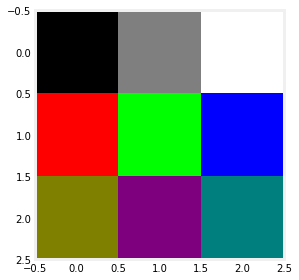

In [7]:
#"Plotting" color images
skimage.io.imshow(simple_image)
plt.grid(False) # Disable matplotlib's grid lines

Many image formats (e.g., JPEG) image values are numbers between 0 and 255 corresponding to a byte. Therefore we divide each pixel value by 255 to obtain numbers between 0 and 1.

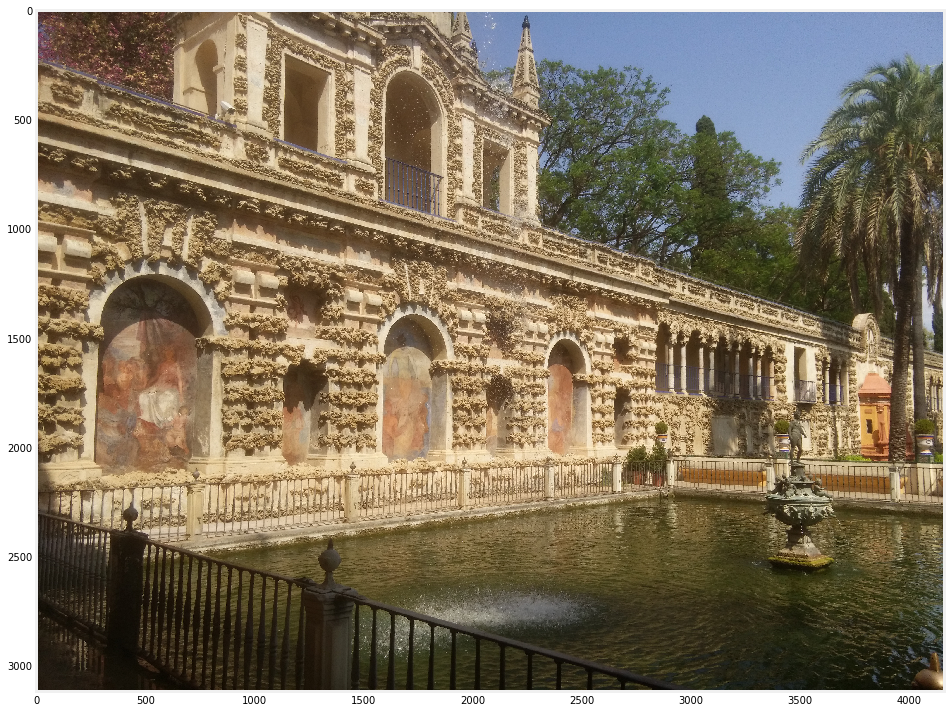

In [8]:
plt.figure(figsize=(20,10))

# Some image files (including .jpg files) have pixel values in between
# 0 and 255 when read. We divide by 255 to scale the values between 0 and 1:
pic = skimage.io.imread('MercuryPond.jpg')/255

#Plotting image
skimage.io.imshow(pic)
plt.grid(False) # Disable matplotlib's grid lines

#### Question 2a

Plot the Red, Green, and Blue color channels separately.  The resulting images should appear in black and white. We do this by indexing through the color channels of `pic`. For example, `pic[:, :, 0]` will slice the image to extract the red color channel (the first two indecies are the horizontal and vertical position of a pixel, respectively). Plotting the resulting matrix will generate a black and white picture but with the extracted color. 

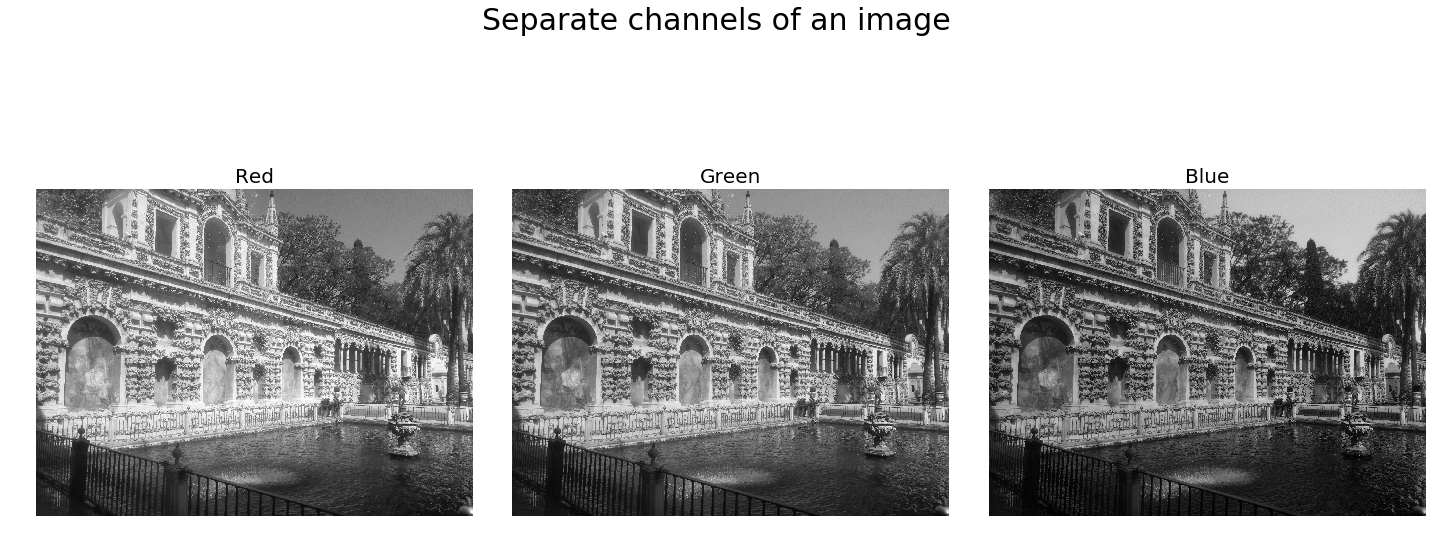

In [26]:
plt.figure(figsize=(20,10)) 
channel_names = ["Red", "Green", "Blue"]

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    skimage.io.imshow(pic[:, :, channel]) # Creating image of channel
    plt.axis('off') #Take off x and y axis
    plt.grid(False)
    plt.title(channel_names[channel], size = 20)
    plt.suptitle("Separate channels of an image", size = 30)

Here we see different shades of black and white pictures corresponding to the color channels. Our eyes recognize certain color channels better then others. Some colors blend in better depending on how the color channels are concentrated. Take a look for youself. What areas appear to change the most in shade?

To prove to you that our eyes discriminate color, we'll use a bluring technique to help us see how color channels affect image apperance. This blur will be more noticable with colors that our eyes favor/are more sensitive and less with colors our eyes don't favor/are less sensitive.

#### Question 2b

First, blur each color channel individually using a Gaussian filter. You should set the standard deviation of the Gaussian blurring kernel `sigma` to 25.

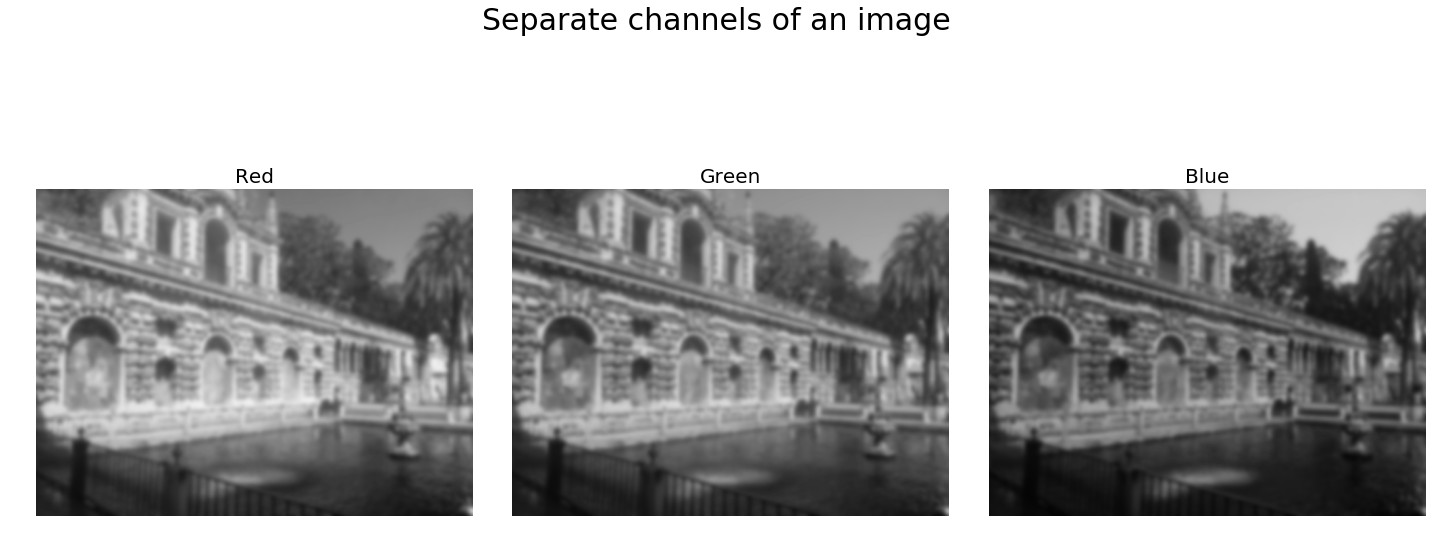

In [30]:
plt.figure(figsize=(20,10))

sigma = 25

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    skimage.io.imshow(
        skimage.filters.gaussian(pic[:, :, channel], sigma = sigma))
    plt.axis('off') #Take off x and y axis
    plt.grid(False)
    plt.title(channel_names[channel], size = 20)
    plt.suptitle("Separate channels of an image", size = 30)

According to the above code, all three channels have the same amount of blurriness. Is one of these pictures more blurry than the others?

Now that we've done this, let's add color back into these pictures.

#### Question 2c

Replace a color channel with a different black and white image. Make a copy of the picture to avoid changing the value of `pic`.

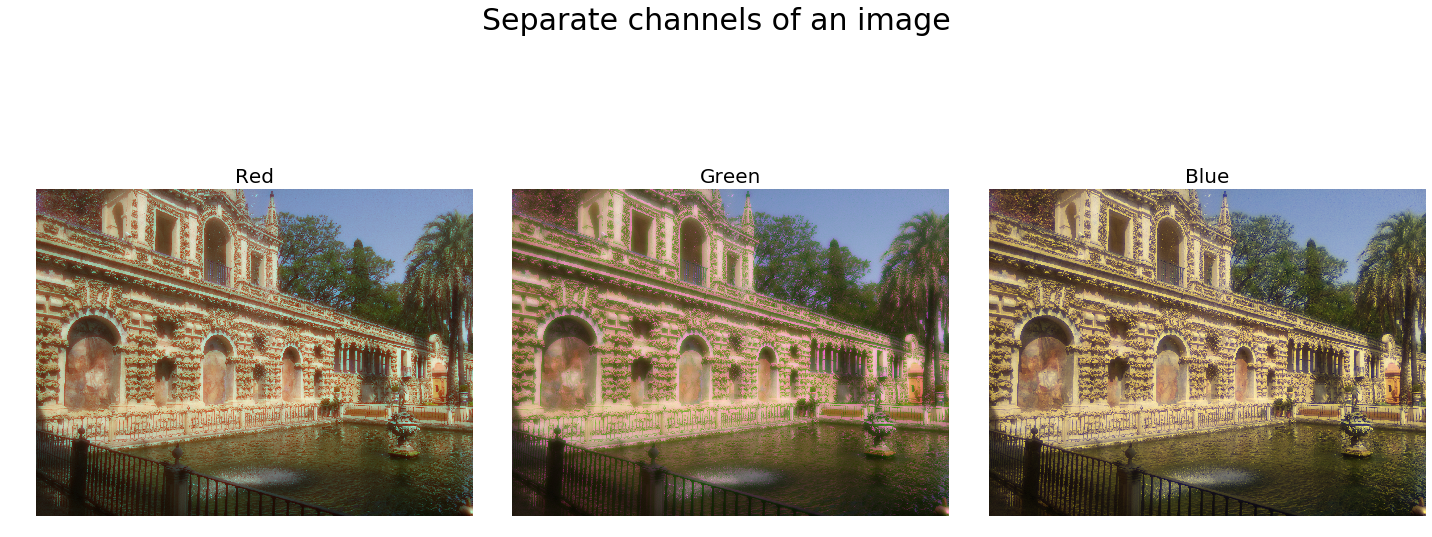

In [32]:
plt.figure(figsize=(20,10))

sigma = 25

# Loop through index of each channel
for channel in range(3):
    # Make a subplot
    plt.subplot(1,3,channel+1)
    pic_copy = pic.copy()
    pic_copy[:, :, channel] = skimage.filters.gaussian(pic[:, :, channel], sigma = sigma)
    skimage.io.imshow(pic_copy)
    plt.axis('off') #Take off x and y axis
    plt.grid(False)
    plt.title(channel_names[channel], size = 20)
    plt.suptitle("Separate channels of an image", size = 30)

The amount of bluriness (or the amount of variation, `sigma` = 25) is the same in these pictures. We see them differently because our eyes are more sensitive towards certain colors. From looking at these pictures, green is what's most sensitive and blue is what's least. Red has some funky shading if looking at it closely a tad of an in-between between green and blue.

## 3. kNN <a id='kNN'>

Suppose we have a dataset containing two different classes, class A and class B, visualized below as purple dots and yellow dots. 

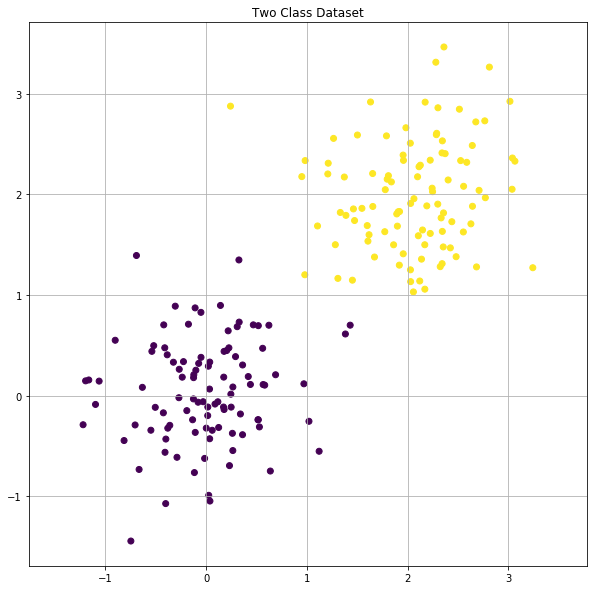

In [34]:
# Code to visualize the dataset
class_A = 0.5 * np.random.randn(100, 2)
class_B = 0.5 * np.random.randn(100, 2) + (2, 2)
class_A = np.append(class_A, np.zeros((100, 1)), axis=1)
class_B = np.append(class_B, np.ones((100,1)), axis=1)
population = np.append(class_A, class_B, axis=0)
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.scatter(population[:,0], population[:,1], c=population[:,2])
plt.title('Two Class Dataset')
plt.grid()
plt.show()

Let's implement a basic K nearest neighbors classifier that classifies a point of interest by finding the Kth nearest neighbors around it. Recall the K-NN algorithm:

Given an example point to classify and the population we are querying from,

1. Find the distance between the example point and each
    point in the data set
    
2. Augment the data table with a column
    containing all the distances to the example point
    
3. Sort the augmented table in increasing order of the
    distances to the example point

4. Take the top k rows of the sorted table to get the K nearest neighbors

#### Question 3 
Fill in the functions below and test the code against the sklearn KNN classifier (write tests to see that your `getNeighbors` finds the same neighbors as the sklearn version).

In [32]:
import operator
from typing import Union

#Writing functions
def distance(p1: np.ndarray, p2: np.ndarray) -> Union[float, int]:
    """
    Return the euclidean distance between two points p1 and p2.
    
    Shape:
        - p1 and p2 are expected to have shape (1,2)
    
    >>> p1 = np.array([1.2, 2])
    >>> p2 = np.array([2, 2])
    >>> distance(p1, p2)
    0.8
    >>> distance(p1, p1)
    0 
    """
    return np.sqrt(np.sum((p1 - p2)**2))

def get_neighbors(example: np.ndarray, population: np.ndarray, k: int=5):
    """
    Find the k nearest neighbors (points) of a population given an example.
    Args:
        example: a chosen point, with shape (1,2)
        population: a 2d array with shape (N, 3). N is the total number of points.
          The first two column represent the x and y coordinates of the points. 
          The third column represent the class of each point, though it's technically
          optional
    
    >>> example = np.array([1, 1])
    >>> population = np.array([
            [0, 0, 0], # point at coordinate (0, 0) belongs to class 0 
            [100, 100, 1] # point at coordinate (100, 100) belongs to class 1
        ])
    >>> get_neighbors(example, population, k=1)
    np.array([
        [0, 0, 0] # point at coordinate (0, 0) is closet to example at (1, 1)
    ])
    """
    distances = np.array(
        [distance(example, population[:,:2][i]) #Calculating distances from ex to pop[i]
            for i in range(len(population))] #Looping
                        ).argsort()[:k] #Sorting min distance
    
    return population[distances] #k-nearest neighbors in a population for an example

def test(example, population, k):
    """
    Compare your results against the sklearn KNN classifier.
    
    This function should create a sklearn KNeighborsClassifier and verify
    that get_neighbors method returns the same result as the KNeighborsClassifier.
    
    >>> example = np.array([[1, 1]])
    >>> population = np.array([
            [0, 0, 0], # point at coordinate (0, 0) belongs to class 0 
            [100, 100, 1] # point at coordinate (100, 100) belongs to class 1
        ])
    >>> # Provided get_neighbors implemented correctly
    >>> test(example, population, k=1)
    True
    """
    #sklearn implementation
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(population[:,:2]) 
    neighbors = neigh.kneighbors(example) #tuple; (distance, index)
    sk_KNN = population[neighbors[1]] #Find k values closest to example
    
    #Our implementation
    our_KNN = get_neighbors(example, population, k)
    
    #Test if our implementation equals sklearn's
    #(Using allclose to avoid type [float] problems)
    return np.allclose(our_KNN, sk_KNN, rtol=1e-10)

In [33]:
# Writing test cases
assert test([[0, 0]], population, 5)
assert test([[2, 2]], population, 5)
assert test([[1, 1]], population, 5)
assert test([[100, 100]], population, 3)
assert test([[-1, -1]], population, 3)

Let's find the 10 closest points to (0, 0) and (2, 2). We'll plot them and see how well our function works.

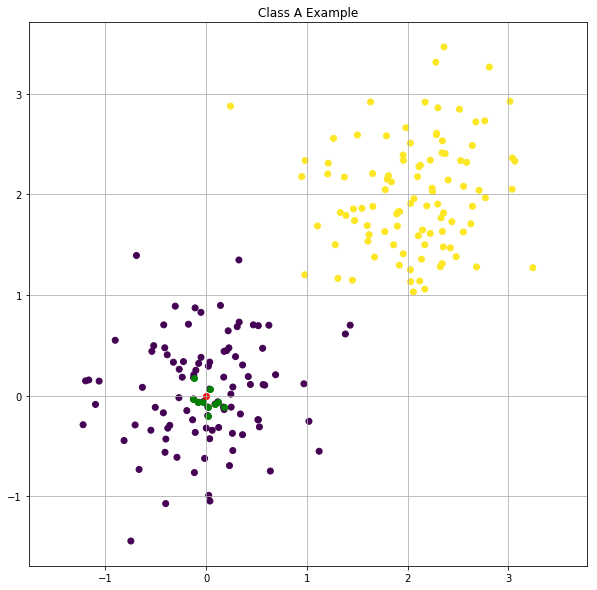

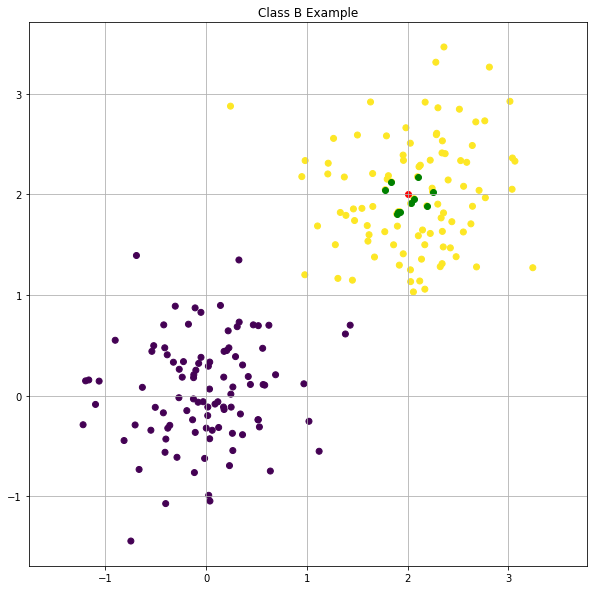

In [35]:
#Plotting k=5 nearest neighbors
example_A = [[0, 0]]
example_B = [[2, 2]]

neighbors_A = get_neighbors(example_A, population, k=10)
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.scatter(population[:,0], population[:,1], c=population[:,2])
plt.scatter(neighbors_A[:,0], neighbors_A[:,1], c='g')
plt.scatter(0,0,c='r')
plt.title('Class A Example')
plt.grid()
plt.show()

neighbors_B = get_neighbors(example_B, population, k=10)
plt.figure(figsize=(10,10))
plt.axis('equal')
plt.scatter(population[:,0], population[:,1], c=population[:,2])
plt.scatter(neighbors_B[:,0], neighbors_B[:,1], c='g')
plt.scatter(2,2,c='r')
plt.title('Class B Example')
plt.grid()
plt.show()